<a href="https://colab.research.google.com/github/Luis-Vilca/TrabajoFinal/blob/main/TrabajoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from numpy.core.numeric import NaN
from sklearn.impute import SimpleImputer
separador = ('=====================================================================')

##Modelos

In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import subplots
from sklearn.neighbors import KNeighborsRegressor as KNr  
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts
from sklearn import neighbors,datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score,precision_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas import get_dummies
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [27]:
df_stroke = pd.read_csv('https://raw.githubusercontent.com/CoolfaceJerkCity/Grupo_N_UDEP_Python/main/df_strokes_lbl_encoded.csv')
display(df_stroke.head())

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_normalized,smoking_status_lbd,residence_type_lbd,work_type_lbd,gender_lbd,ever_married_lbd
0,67.0,0,1,228.69,1,36.60,1,1,2,1,1
1,61.0,0,0,202.21,1,28.89,2,0,3,0,1
2,80.0,0,1,105.92,1,32.50,2,0,2,1,1
3,49.0,0,0,171.23,1,34.40,3,1,2,0,1
4,79.0,1,0,174.12,1,24.00,2,0,3,0,1


[[0.81689453 0.         1.         ... 0.5        0.5        1.        ]
 [0.74365234 0.         0.         ... 0.75       0.         1.        ]
 [0.97558594 0.         1.         ... 0.5        0.5        1.        ]
 ...
 [0.42626953 0.         0.         ... 0.75       0.         1.        ]
 [0.62158203 0.         0.         ... 0.5        0.5        1.        ]
 [0.53613281 0.         0.         ... 0.         0.         1.        ]]
****************************************************************************************************
Codo de Jambu:MEJOR K


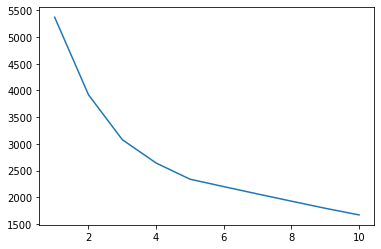

****************************************************************************************************
Gráfico con el mejor K=2


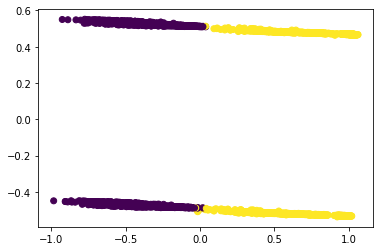

****************************************************************************************************


In [28]:
x= df_stroke.drop(columns =['stroke','residence_type_lbd','gender_lbd','work_type_lbd','smoking_status_lbd'])
y = df_stroke['stroke']

scaler=MMS()
Xdta=scaler.fit_transform(np.array(df_stroke))
print(Xdta)
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i,max_iter=300)
  k_means.fit(Xdta)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu
print("*"*100)
print("Codo de Jambu:MEJOR K")
plt.plot(range(1,11),inercia)
plt.show()
#Según grafico, el mejor K= 2
print("*"*100)
print("Gráfico con el mejor K=2")
k_m2=KMeans(n_clusters=2)
k_m2.fit(Xdta)
label=k_m2.labels_

Pca=PCA(n_components=3)
Pca.fit(Xdta)
Xpca=Pca.fit_transform(Xdta)
#  Grafico
plt.scatter(Xpca[:,0],Xpca[:,1],c = label)
plt.show()
print("*"*100)
######################################################################3
#Data de entrenamiento y Prueba
x=Xpca
y=label
Xtrain, Xtest, ytrain, ytest = tts(x, y, test_size = 0.25, random_state = 42)
#Escalamiento
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

Modelo de regresión logística

In [29]:
#### Logistic regresion ###
modellogistic = LogisticRegression(random_state = 42)
modellogistic.fit(Xtrain, ytrain)

### Predicción de y-train y y-test ###
y_predi_test = modellogistic.predict(Xtest)
y_predi_train = modellogistic.predict(Xtrain)
##Accuracy-EXACTITUD ###
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(ytest, y_predi_test)
print(f"Accuracy score: {acc1}")
#########################  PARA TRAIN  ###########################

score_logistc_train = modellogistic.score(Xtrain,ytrain)
recall_logistic_train  = recall_score(ytrain,y_predi_train)
precision_logistic_train = precision_score(ytrain, y_predi_train)
matriz_logistic_train = confusion_matrix(ytrain,y_predi_train)

########################  PARA VALIDACION  #######################

score_logistc_test = modellogistic.score(Xtest,ytest)
recall_logistic_test  = recall_score(ytest,y_predi_test)
precision_logistic_test = precision_score(ytest, y_predi_test)
matriz_logistic_test = confusion_matrix(ytest,y_predi_test)

print('')
print('_'*90)
print('')
print('El score en entrenamiento es                :    ', score_logistc_train)
print('El recall en entrenamiento es               :    ', recall_logistic_train)
print('La precision en entrenamiento es            :    ', precision_logistic_train)
print('La matriz de confusión en entrenamiento es  :    ', matriz_logistic_train)

print('-'*90)

print('El score en validacion es                   :    ', score_logistc_test)
print('El recall en validacion es                  :    ', recall_logistic_test)
print('La precision en validacion es               :    ', precision_logistic_test)
print('La matriz de confusión en validación es     :    ', matriz_logistic_test)
print('')
print('_'*90)
print('')
## Graficas de Validación ###
Trasas=go.Figure()
Trasas.add_trace(go.Scatter(x=Xtest,y=ytest,name='Xtest',mode='markers',marker_color='rgba(111,0,0,0.81)'))
Trasas.add_trace(go.Scatter(x=Xtest,y=y_predi_test,name='Linea de Regresión',mode='lines',marker_color='rgba(260,0,0,0.81)'))
Trasas.update_layout(title='Gráfica de Validación con data de prueba')

Accuracy score: 0.9992175273865415

__________________________________________________________________________________________

El score en entrenamiento es                :     0.9994780793319415
El recall en entrenamiento es               :     0.9984871406959153
La precision en entrenamiento es            :     1.0
La matriz de confusión en entrenamiento es  :     [[2510    0]
 [   2 1320]]
------------------------------------------------------------------------------------------
El score en validacion es                   :     0.9992175273865415
El recall en validacion es                  :     0.9976958525345622
La precision en validacion es               :     1.0
La matriz de confusión en validación es     :     [[844   0]
 [  1 433]]

__________________________________________________________________________________________



Modelo KNN


__________________________________________________________________________________________

El score en entrenamiento es                :     1.0
El recall en entrenamiento es               :     1.0
La precision en entrenamiento es            :     1.0
La matriz de confusión en entrenamiento es  :     [array([[2510,    0],
       [   0, 1322]])]
------------------------------------------------------------------------------------------
El score en validacion es                   :     1.0
El recall en validacion es                  :     1.0
La precision en validacion es               :     1.0
La matriz de confusión en validación es     :     [array([[844,   0],
       [  0, 434]])]

__________________________________________________________________________________________

Grafica de Exactitud con los diferentes K


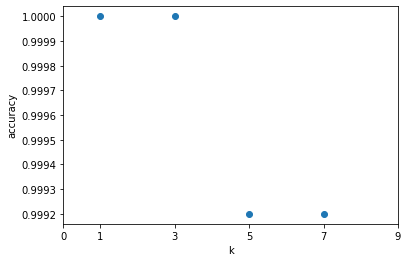

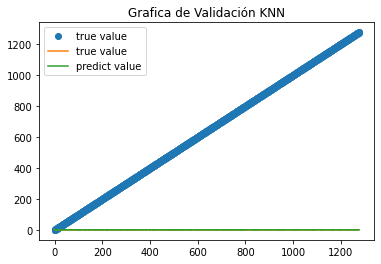

In [30]:
#Modelo knn
scoretrain = []
recalltrain = []
precisiontrain = []
matrixtrain = []

scoreval = []
recallval = []
precisionval =[]
matrixtest = []

for k in [1,3,5,7]:
  modeloKNN = knn(n_neighbors=k)
  modeloKNN.fit(Xtrain,ytrain)

  ypreditest = modeloKNN.predict(Xtest) #Para test
  ypredtrain = modeloKNN.predict(Xtrain) #Para train 


  #########################  PARA TRAIN  ###########################

  score_totaltrain = modeloKNN.score(Xtrain,ytrain)
  scoretrain.append(round(score_totaltrain,4))

  recallscoretrain  = recall_score(ytrain,ypredtrain)
  recalltrain.append(round(recallscoretrain,4))

  precisionscoretrain = precision_score(ytrain, ypredtrain)
  precisiontrain.append(round(precisionscoretrain,4))

  matrizconftrain = confusion_matrix(ytrain,ypredtrain)
  matrixtrain.append([matrizconftrain])
   ########################  PARA VALIDACION  #######################

  score_totalvalidation = modeloKNN.score(Xtest,ytest)
  scoreval.append(round(score_totalvalidation,4))

  recallscoreval  = recall_score(ytest,ypreditest)
  recallval.append(round(recallscoreval,4))

  precisionscoreval = precision_score(ytest, ypreditest)
  precisionval.append(round(precisionscoreval,4))

  matrizconftest = confusion_matrix(ytest,ypreditest)
  matrixtest.append([matrizconftest])
print('')
print('_'*90)
print('')
print('El score en entrenamiento es                :    ', scoretrain[1])
print('El recall en entrenamiento es               :    ', recalltrain[1])
print('La precision en entrenamiento es            :    ', precisiontrain[1])
print('La matriz de confusión en entrenamiento es  :    ', matrixtrain[1])

print('-'*90)

print('El score en validacion es                   :    ', scoreval[1])
print('El recall en validacion es                  :    ', recallval[1])
print('La precision en validacion es               :    ', precisionval[1])
print('La matriz de confusión en validación es     :    ', matrixtest[1])
print('')
print('_'*90)
print('')
#Grafica de Exactitud con los diferentes K
k_evaluados=[1,3,5,7]
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_evaluados, scoreval)
plt.xticks([0,1,3,5,7,9])
print("Grafica de Exactitud con los diferentes K")
plt.show()
#Grafica de Validación
plt.figure()
plt.plot(np.arange(len(ypreditest)),'o',ytest,label='true value')
plt.plot(np.arange(len(ypreditest)),ypreditest,label='predict value')
plt.title('Grafica de Validación KNN')
plt.legend()    
plt.show()

Modelo SVC

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00       522

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533

matriz de confusión para el testeo de SVM
[[1011    0]
 [   0  522]]
____________________________________________________________
matriz de confusión para el entrenamiento de SVM
[[2343    0]
 [   0 1234]]


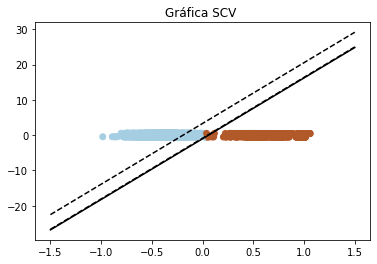

In [31]:
####CODIGO PARA SVC####
Xtrain,Xtest,ytrain,ytest=tts(x,y,test_size=0.3, random_state=42)
model=SVC(gamma='auto',kernel='linear')
model.fit(Xtrain,ytrain)
predic=model.predict(Xtest)
predictest=model.predict(Xtrain)

print(classification_report(ytest,predic))
print('matriz de confusión para el testeo de SVM')
print(confusion_matrix(ytest,predic))
print('_'*60)
print('matriz de confusión para el entrenamiento de SVM')
print(confusion_matrix(ytrain,predictest))
##Gráfica Analítica##
#Recta para separar las clases##
w= model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1.5, 1.5)
yy = a * xx - (model.intercept_[0]) / w[1]
# vectores
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=plt.cm.Paired)

plt.title('Gráfica SCV ')
plt.axis('tight')
plt.show()

Modelo Random Forest

________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00       506

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533

matriz de confusión para el testeo de random forest
[[1027    0]
 [   0  506]]
____________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2327
           1       1.00      1.00      1.00      1250

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577

matriz de confusión para el entrenamiento de random forest
[[2327    0]
 [   0 1250]]
_______________________________________

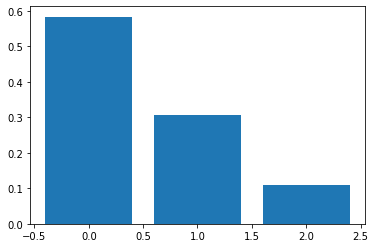

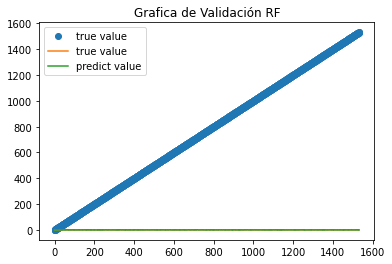

In [32]:
##RESULTADOS PARA RRANDOM FOREST
Xtrain1,Xtest1,ytrain1,ytest1=tts(x,y,test_size=0.3)
randonforest=RFC(n_estimators=200)
randonforest.fit(Xtrain1,ytrain1)
predicrandon=randonforest.predict(Xtest1)
predicrandontest=randonforest.predict(Xtrain1)

print('_'*80)
print(classification_report(ytest1,predicrandon))
print('matriz de confusión para el testeo de random forest')
print(confusion_matrix(ytest1,predicrandon))
print('_'*60)
print(classification_report(ytrain1,predicrandontest))
print('matriz de confusión para el entrenamiento de random forest')
print(confusion_matrix(ytrain1,predicrandontest))
print('_'*60)
## Histograma de la importancia de las variables ##
print("Histograma de la importancia de las variables")
plt.bar(range(len(randonforest.feature_importances_)), randonforest.feature_importances_)
plt.show()
#Grafica de Validación
plt.figure()
plt.plot(np.arange(len(predicrandon)),'o',ytest1,label='true value')
plt.plot(np.arange(len(predicrandon)),predicrandon,label='predict value')
plt.title('Grafica de Validación RF')
plt.legend()    
plt.show()

##Funciones para validar datos

In [15]:
def lee_float():
   while True:
       entrada = input("Ingrese un valor: ")
       try:
           entrada = float(entrada)
           return entrada
       except ValueError:
           print(separador)
           print("Valor no válido") 
           

In [16]:
def lee_float2():
  #Float con rango de valores
    while True:
       entrada = input("Ingrese un valor: ")
       try:
         entrada = float(entrada)
         if (1 <= float(entrada) <= 4):
           return entrada
         else:
           print("Valor no válido")
       except ValueError:
           print(separador)
           print("Valor no válido")

In [17]:
def lee_floatbin():
  #Float con rango de valores
    while True:
       entrada = input("Ingrese un valor: ")
       try:
         entrada = float(entrada)
         if (0 <= float(entrada) <= 1):
           return entrada
         else:
           print("Valor no válido")
       except ValueError:
           print(separador)
           print("Valor no válido")

##Seleccionar modelo

In [33]:
def seleccionamodelo(paciente):
  #Panel de opciones
  print('Ingrese el número de modelo que desea emplear')
  print('1 para el modelo Logistic Regresion')
  print('2 para el modelo KNN')
  print('3 para modelo SVC')
  print('4 para modelo Random Forest')
  
  #Opciones a ingresar

  contador = 0
  opciones = []
  pregunta = 's'
  
  while pregunta == 'S' or pregunta == 's':
    
    if contador == 4:
      break
    
    opciones.append(lee_float2())
    pregunta = input('S para elegir un modelo adicional u otra tecla para salir: ')
    contador +=1

  print(opciones)
  
  #Ejecutar los modelos

  for i in range(0,len(opciones)):
    
    #Modelo Logistic regresion
    if opciones[i] == 1:
      datos_paciente = pd.DataFrame(paciente)
      prediction = modellogistic.predict(datos_paciente)         
      if prediction == 0:
          print('Tiene bajo riesgo de sufrir un derrame')
      else:
          print('Tiene un riesgo elevado de sufrir un derrame')
      display(datos_paciente.head())
    
    #Modelo KNN
    elif opciones[i] == 2:
      datos_paciente = pd.DataFrame(paciente)
      prediction = modeloKNN.predict(datos_paciente)        
      if prediction == 0:
          print('Tiene bajo riesgo de sufrir un derrame')
      else:
          print('Tiene un riesgo elevado de sufrir un derrame')
      display(datos_paciente.head())
    
    #Modelo SVC
    elif opciones[i] == 3:
      datos_paciente = pd.DataFrame(paciente)
      prediction = model.predict(datos_paciente)      
      if prediction == 0:
          print('Tiene bajo riesgo de sufrir un derrame')
      else:
          print('Tiene un riesgo elevado de sufrir un derrame')
      display(datos_paciente.head())          
    
    #Modelo RF
    elif opciones[i] == 4:
      datos_paciente = pd.DataFrame(paciente)
      prediction = randonforest.predict(datos_paciente)     
      if prediction == 0:
          print('Tiene bajo riesgo de sufrir un derrame')
      else:
          print('Tiene un riesgo elevado de sufrir un derrame')
      display(datos_paciente.head())


##Main

In [19]:
#Función para llenar datos
def llenardatos():
  info = []
  global df_stroke
  y = df_stroke["stroke"] 
  X = df_stroke.drop(["stroke", "id", "gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis=1)
  columnas = list(X.columns.values)
  for i in range(0,len(columnas)):
      
      if columnas[i]== 'age':
        print('Ingrese su edad')
        info.append(lee_float())
      
      elif columnas[i]== 'hypertension':
        print('Ingrese 1 si sufre de hipertensión o 0 si no es el caso')
        info.append(lee_floatbin())
      
      elif columnas[i]== 'heart_disease':
        print('Ingrese 1 si sufre de enfermedades cardíacas o 0 si no es el caso')
        info.append(lee_floatbin())
      
      elif columnas[i]== 'avg_glucose_level':
        print('Ingrese su nivel de glucosa')
        
        info.append(lee_float())
      
      else:
        print('Ingrese su índice de masa corporal')
       
        #Normalizado
        X_bmi = np.array(df_stroke['bmi'])
        X_bmi.append(lee_float())
        
        X_bmi2 = np.reshape(X_bmi, (len(X_bmi), 1))
        imp_mean = SimpleImputer(missing_values = NaN, strategy='mean')
        X_bmi_normalized = imp_mean.fit_transform(X_bmi2)

        #Estandarizado
        scaler = StandardScaler().fit(X_bmi_normalized)
        x_feat_standarized = scaler.transform(x_bmi_normalized)
        
        bmi = 

        info.append(bmi)
      
      print(separador)

  paciente = dict(zip(columnas,info))
  print(paciente)
  return paciente

llenardatos()

SyntaxError: ignored

In [ ]:
def main():
  print('Bienvenido al programa')
  print('Ingrese los valores de las siguientes columnas: ')

  paciente = llenardatos()

  seleccionamodelo(paciente)

main()